<a href="https://colab.research.google.com/github/riddhi-mehta-1721/Oil_Palm_Classification_FastAI/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMPUTER VISION** PROJECT ON GOOGLE SATELLITE IMAGES.

## TEAM MEMBERS:

* MAAZ ANSARI (**J002**)
* HARSH GUPTA (**J017**)
* RIDDHI MEHTA (**J030**)

### Class: BTech Data Science 
### Semester: VI

## Importing Libraries

In [0]:
import pandas as pd
import numpy as np

import os
import glob

from fastai.vision import *
from fastai.metrics import accuracy
from fastai.vision import image as im

from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Reading Train Data from specified path and listing its contents

In [0]:
labels = os.listdir('/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Train')
print("No. of labels: {}".format(len(labels)))
print("-----------------")
for label in labels:
    print("{}, {} files".format(label, len(os.listdir('/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Train/'+label))))

No. of labels: 2
-----------------
0, 2257 files
1, 768 files


## Specifying parameter values for "fastai"

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Train'
size = 256
bs = 256

## Compiling images and loading it in ImageDataBunch function

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True),
                                  valid_pct=0.2, size=size, bs=bs)

## Displaying a few examples

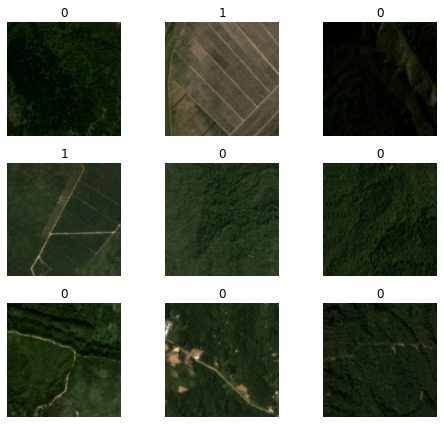

In [0]:
data.show_batch(rows=3, figsize=(7,6))

## Data normalization using "imagenet_stats" 

* The fastai models are trained on imagenet images. 
* It decreases computation time.
* Reduces heavy numbers into a more consistent and normalized format.  



In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2420 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,0,0,0
Path: /content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Train;

Valid: LabelList (605 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
0,0,0,0,1
Path: /content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Train;

Test: None

## Plotting Learning Rate

We require the learning rate graph to visually decide which learning rate has to be used in order to train the images.

In [0]:
learner = create_cnn(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


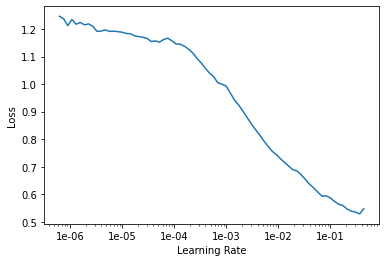

In [0]:
learner.lr_find()
learner.recorder.plot()

## Fitting one cycle with 5 epochs.

* We have used the learning rate of = **1e-01** as we can see in the graph above.
* Since the data is heavy, and image sizes are also significantly large, we observe that every epoch takes an approx. 10 minutes.
* Overall, the model has trained for **50 minutes**.

epoch,train_loss,valid_loss,accuracy,time
0,0.223235,0.122588,0.988333,10:34
1,0.541890,7.306499,0.655000,09:35
2,0.503985,0.501260,0.986667,09:42
3,0.341435,0.017828,0.996667,09:37
4,0.175752,0.011502,0.996667,09:39


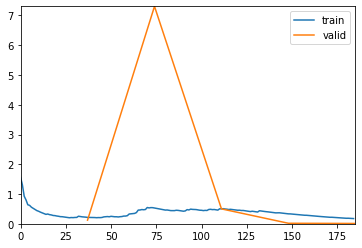

In [0]:
learner.fit_one_cycle(5, max_lr=slice(1e-1))

## Saving the model

We can load this model for future use. Since, we also have test data, we will use this saved model in order to classify our test images.

Also, we have named this model as "before_unfreeze" since we will be obtaining another model weights after executing "learner.unfreeze()".

In [0]:
learner.save(r'/content/drive/My Drive/Colab Notebooks/CV - Sem 6/models/before_unfreeze.pth')

## Confusion matrix of Validation Data

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

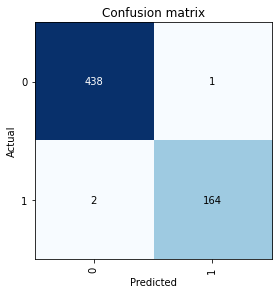

In [0]:
interp.plot_confusion_matrix()

## Unfreeze the CNN Layers

We now unfreeze the neural network layers. So the main difference is:

> Before Unfreezing

* Training = CNN Layers (Frozen) + FC Layers (Training)

> After Unfreezing

* Training = CNN Layers (Training) + FC Layers (Training)



epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


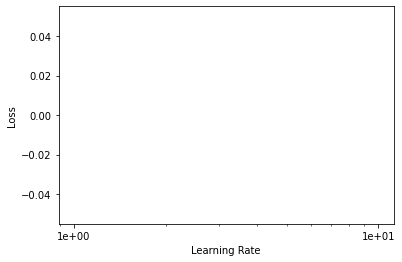

In [0]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

There are generally 2 situations in which "unfreezing" is done.
* The **accuracy** is NOT high enough.
* The **loss** is NOT low enough.

But, in this case:
* The accuracy is already **99%**.
* The loss is already **0.01**.

There is no need to unfreeze because the accuracy has already reached its peak, as well as the loss being so low of value 0.01 **cannot** be plotted on the graph. Hence, we do not even obtain the _NEW model weights_.

## Prediction on Test Data

In [0]:
learner = learner.load(r'/content/drive/My Drive/Colab Notebooks/CV - Sem 6/models/before_unfreeze.pth')

In [0]:
pathlist = list(glob.glob(r'/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/*.jpg'))
pathlist

['/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/1_4.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/1_2.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/1_3.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/0_4.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/0_1.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/0_5.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/0_3.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/0_2.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/1_5.jpg',
 '/content/drive/My Drive/Colab Notebooks/CV - Sem 6/Project_Data_Test/test_all/1_1.jpg']

#### Creating a user defined function in order to predict, and create confusion matrix for test data

In [0]:
def predict_img(imagelist):

  y_pred = []
  y_true = []
  for img_path in imagelist:

    img = im.open_image(img_path)
    (pred_class,pred_label,__) = learner.predict(img)
    y_pred.append(int(pred_label))
    y_true.append(int(img_path.split('/')[-1].split('_')[0]))
    
  return y_pred, y_true

In [0]:
y_pred,y_true = predict_img(pathlist)
y_pred

[1, 1, 1, 0, 0, 0, 0, 0, 1, 1]

In [0]:
print("Confusion matrix for test dataset is as follows:", end = "\n\n")
print(confusion_matrix(y_true, y_pred))

Confusion matrix for test dataset is as follows:

[[5 0]
 [0 5]]


### **Congratulations!** 

We observe that the model is able to predict the test data with an accuracy of 100%.

## ---------------------------------------------------------------- **THE END** ----------------------------------------------------------------